# AIM Drone Optimizer

L'obiettivo del progetto è risolvere una semplice variante del problema del commesso viaggiatore (noto problema di ottimizzazione combinatoria con riscontri pratici ancora attuali, per saperne di più: https://en.wikipedia.org/wiki/Travelling_salesman_problem) con alcuni semplici metodi, usando basi di programmazione a oggetti e alcune librerie di base.

Il punteggio accumulabile con questa challenge è di **4 punti**.
Segue il testo completo. 

PS Per suggerimenti, problemi, approfondimenti o altro, potete contattarmi all'indirizzo filippo.fedeli@mail.polimi.it o su cellulare al +393386561042

#Definizione del problema <font color='red'>(1 punto)</font> 

Nel 2020, AIM è diventata così popolare da non permettere al team amministrativo di gestire la consegna delle tessere AIM. Viene dunque valutato l'acquisto di un Drone AIM, in grado di volare e atterrare dove necessario.

Il tuo compito, come nuovo intern del team amministrativo è, conoscendo a priori le posizioni (date dalla variabile positions) dei soci a cui si deve portare le tessere, ottimizzare il percorso del drone in modo da minimizzare la distanza percorsa dal drone. 

In particolare, vengono studiate due opzioni: la prima, con un drone in grado di volare in ogni direzione, per cui la metrica da ottimizzare è il **MSE**, ovvero il mean squared error (più propriamente in realtà somma della distanza euclidea-L2 al quadrato tra i punti, lo definiamo impropriamente MSE per comodità), la seconda, con un drone in grado di volare soltanto in direzione degli assi cardinali, per cui la metrica da ottimizzare è il **MAE**, mean average error (in realtà, somma delle distanze Manhattan-L1, valgono le stesse considerazioni che per il MSE).

Per **prima cosa**, definisci una funzione MSE e una funzione MAE per valutare la qualità dei percorsi, dove, essendo la lista di posizioni ordinate: 

 $$ MSE = \frac{1}{n}\sum_{t=1}^{n} (x_{t}-x_{t-1})^2 + (y_{t}-y_{t-1})^2   $$

 $$ MAE = \frac{1}{n}\sum_{t=1}^{n} |x_{t}-x_{t-1}| + |y_{t}-y_{t-1}|   $$

Mostra a schermo il MAE e il MSE della lista iniziale positions.

PS Ti sono inoltre date varie funzioni per visualizzare il percorso del drone che ricevono in ingresso una lista di liste strutturata come positions, con le posizioni in ordine di visita del drone.
e.g. se decido di far visitare al drone in ordine le posizioni (x = 1, y= 1), (x = 4, y = 2), (x = 3, y = 4),  la lista finale sarà = [[1,1],[4,2],[3,4]].
Il punto iniziale viene rappresentato in verde. Il secondo in blu, in modo da vedere il verso della traiettoria rappresentata.


PS2 In modo da vedere l'immagine, deve trovarsi all'interno della stessa cartella in cui si trova il notebook.



In [11]:
#!pip install matplotlib

!pip3 install matplotlib

# Su Mac, esegui il secondo comando e commenta il primo.
# Se stai usando Anaconda, NON eseguire la cella.

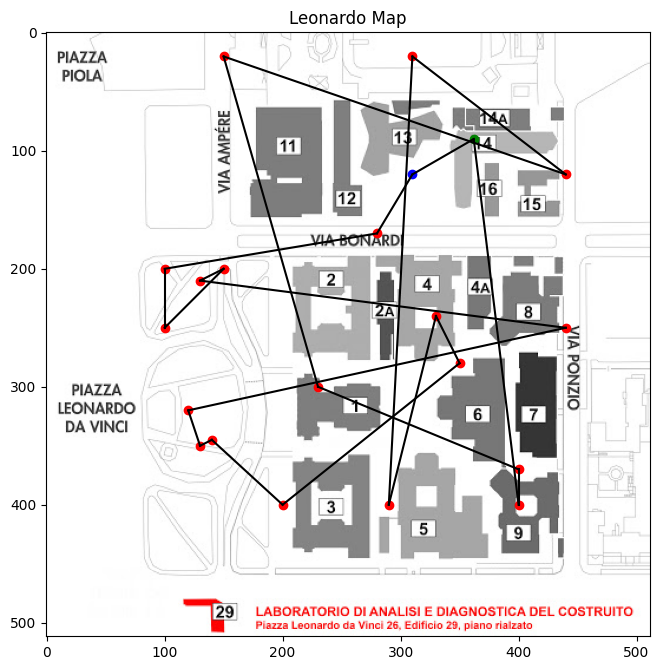

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imread("poli2.jpg")
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],[130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],
            [440,120],[150,20],[230,300],[400,370],[400,400],[362,90]]


# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')

trajectory(positions)
plt.imshow(img)
# visualizza l'immagine

In [13]:
def MSE(pos):
    # your code goes here....
    mse = 0
    for i in range(len(pos)-1):
        mse += (pos[i+1][0]-pos[i][0])**2+(pos[i+1][1]-pos[i][1])**2
    return mse/len(pos)
def MAE(pos):
    # your code goes here....
    mae = 0
    for i in range(len(pos)-1):
        mae += abs(pos[i+1][0]-pos[i][0])+abs(pos[i+1][1]-pos[i][1])
    return mae/len(pos)

In [14]:
def performance(pos,metrics = MSE):
    loss = metrics(pos)
    return(loss)
    
print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions, MAE)}")

MSE = 36818.09090909091
MAE = 181.36363636363637


# Random Optimizer <font color='red'>(1 punto)</font> 

Ora, costruiamo una classe Random_Optimizer che, ad ogni passo, si muove random in una delle posizioni ancora non visitate. La struttura della classe è già data qui di seguito, comprese le funzioni per plottare le traiettorie. 

Funziona meglio della disposizione di base? 

**Bonus**

E se invece modifichiamo la classe in modo che provi 100 traiettorie random e restituisca la migliore? 

NB : In questo caso dovremmo passare alla classe, come nel caso successivo del greedy, una metrica con cui misurare quale sia la soluzione 'migliore'.



In [15]:
import random

class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):

        # your code goes here....
        pos = self.positions.copy()
        start = self.positions[0]
        end = pos.pop()
        random.shuffle(pos)
        index = int(pos.index(start))
        pos[0], pos[index] = pos[index], pos[0]
        pos.append(end)
        self.schedule = pos
        return(self.schedule)

    def plot(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')

    def plot_MAE(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')



# Greedy Optimizer <font color='red'>(2 punti)</font> 

Come passo finale, invece, ereditando da Random_Optimizer (in questo modo non c'è bisogno di ridare alla classe che creiamo tutte le funzioni che sono in comune con la classe base, per maggiori informazioni: https://www.python-course.eu/python3_inheritance.php), costruiamo una classe Greedy_Optimizer che, ad ogni passo, si muove nella posizione più vicina alla posizione precedente. In questo caso, passiamo alla classe anche la funzione che vogliamo ottimizzare (MSE o MAE), visto che sarà diverso il concetto di 'più vicino' nei due casi.


(In Python, le funzioni sono a tutti gli effetti **oggetti**, dunque possono essere passate come parametri ad altre funzioni (o classi))

In [16]:
class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss

    def scheduler(self):
        
        # your code goes here...
        pos = self.positions.copy()
        end = pos.pop()
        self.schedule = [self.positions[0]]
        new = None
        while len(pos) != 0:
                minimum = 100000
                pos.remove(self.schedule[-1])
                for i in pos:
                    if performance([self.schedule[-1],i], self.loss) <= minimum:
                        minimum = performance([self.schedule[-1],i], self.loss)
                        new = i
                self.schedule.append(new)
        self.schedule.append(end)
        return(self.schedule)





Ora paragona le performances dei metodi proposti sopra, ottimizzando prima rispetto al MSE e poi rispetto al MAE. 

Plottando e guardando a occhio, sembra che la soluzione del greedy sia ottimale? Lascia sotto il plot della traiettoria ottenuta dal greedy con MSE.

Riporta inoltre il MAE e il MSE ottenuti con il vettore iniziale, il Random_Optimizer (fissando il seed) e il Greedy_Optimizer.



Performance of Random_Opt = 48819.0
Performance of Initial schedule = 36818.09090909091
Performance of Greedy_Opt = 12469.478260869566


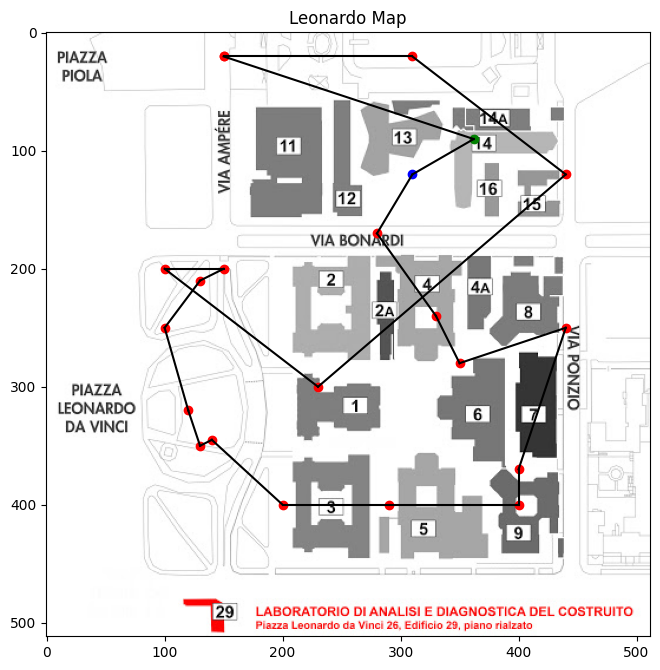

In [17]:
random.seed(10)

metrics = MSE

D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)


print(f"Performance of Random_Opt = {performance(D1.scheduler(), metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.scheduler(), metrics)}")



D2.plot()
plt.imshow(img)



In [18]:
metrics = MSE
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)

%timeit performance(D1.scheduler(), metrics)
%timeit performance(D2.scheduler(), metrics)

10000 loops, best of 3: 28.4 µs per loop
1000 loops, best of 3: 398 µs per loop


# (Honours Track) Random Greedy Optimizer <font color='red'>(Tanta gloria e una maglietta)</font> 

**Facoltativo** : (vale fino a 0.5 punti più del cap di 5 della somma delle challenges, ovvero, se prendo 4 punti qui e 3 in un'altra challenge + l'honours track, posso arrivare a 7.5 punti)

Un problema dell'algoritmo greedy sopra descritto è il fatto che sia **deterministico**. Costruiamo dunque un random greedy, che segua più o meno l'idea del greedy, ma aggiungendo una parte non deterministica. 

Per esempio, in questo caso, possiamo decidere di non scegliere più sempre la posizione più vicina a quella corrente come posizione successiva, ma, per esempio, campionando una distribuzione di probabilità proporzionale all'inverso delle distanze da tutti gli altri punti  (usa np.random.choice, https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html). 
Si ripete poi questo processo varie volte, salvando i vari tragitti e restituendo all'utente finale il tragitto migliore.

In questo modo, otteniamo un algoritmo che, pur non essendo molto efficiente (non impara nulla dalle soluzioni migliori, per quello andrebbe raffinato (per esempio usando un algoritmo genetico o ACO)), restringe comunque lo spazio degli stati e risulta molto più efficiente di un random puro. Inoltre, pur avendo le soluzioni una qualità media peggiore del greedy puro, può variare e quindi spesso restituisce una soluzione migliore, con un numero sufficiente di iterazioni (1000/10000).

Dopo aver scritto l'algoritmo, fissa il seed e mostra a schermo l'MSE e la traiettoria migliore ottenuta; è l'ottimo?


**IMPORTANTE: Lo studente che otterrà il MSE migliore e <10000 (usando l'algoritmo che preferisce (più o meno, no exhaustive search e no ottimizzazione a mano), riceverà un fantastico 
premio.** 

Se avete dubbi sulla definizione del MSE, mandatemi il tragitto finale (o il modello, dicendomi il seed usato, se c'è una componente randomica) per valutazione in itinere.



In [19]:
!pip install numpy

#!pip3 install numpy

# Su Mac, esegui il secondo comando e commenta il primo.
# Se stai usando Anaconda, NON eseguire la cella.



In [20]:
import numpy as np
np.random.seed(3)

class Random_Greedy_Optimizer(Greedy_Optimizer):
    def __init__(self, positions, loss, iterations):
        super().__init__(positions,loss)
        self.iterations = iterations

    def scheduler(self):

        # your code goes here...

        return(self.schedule)


    def run(self):
        schedules = []
        for i in range(iterations):
            schedules.append(self.scheduler())

        # your code goes here...

        return(self.schedule)
        


Adottiamo qui, in realtà un approccio naïf, che può essere molto raffinato anche nelle sue versioni più semplici; per prima cosa, precalcolare la matrice delle distanze è fondamentale per la maggior parte dei metodi più sofisticati e, anche nel caso del (random) greedy, porterebbe ad un algoritmo più veloce.

Vi lascio dunque una lista delle estensioni possibili:

* Ricerca esaustiva (SCONSIGLIATO, diventa molto lento già così, in quanto scala fattorialmente)  
* Programmazione lineare mista/intera (https://towardsdatascience.com/how-i-saved-christmas-with-the-travelling-salesman-problem-3d85c190ed9d)

* Programmazione Dinamica -> Algoritmo di Held-Karp (https://medium.com/basecs/speeding-up-the-traveling-salesman-using-dynamic-programming-b76d7552e8dd)

* Ant Colony Optimization (https://github.com/ppoffice/ant-colony-tsp/blob/master/aco.py)

* Algoritmi Genetici (https://towardsdatascience.com/python-genetic-algorithms-and-the-traveling-salesman-problem-f65542fae5d)

* Cross-entropy (https://github.com/v-iashin/CrossEntropyTSP)

* Simulated Annealing (https://towardsdatascience.com/how-to-solve-the-traveling-salesman-problem-a-comparative-analysis-39056a916c9f)

e molte altre ancora...

Pro Tip: per accedere a tutti gli articoli premium di Medium, potete installare un'estensione come Mediumship, su Chrome: https://github.com/swapagarwal/mediumship.